In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [158]:
df = pd.read_csv('data.csv')

In [159]:
df

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181
...,...,...,...,...,...
4567,26.0,4.472360,0.717090,Micro,94.685866
4568,71.0,20.610685,6.545573,Nano,249.101915
4569,44.0,19.800072,5.096192,Micro,163.631457
4570,71.0,17.534640,1.940873,Macro,253.610411


In [160]:
new_df = df.dropna()

In [161]:
new_df

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181
...,...,...,...,...,...
4567,26.0,4.472360,0.717090,Micro,94.685866
4568,71.0,20.610685,6.545573,Nano,249.101915
4569,44.0,19.800072,5.096192,Micro,163.631457
4570,71.0,17.534640,1.940873,Macro,253.610411


In [162]:
category_mapping = {
    'Mega' : 3.5,
    'Macro' : 2.5,
    'Micro' : 1.5,
    'Nano' : 0.5
}

In [163]:
new_df['Influencer_encoded'] = new_df['Influencer'].replace(category_mapping)

C:\Users\dabee\AppData\Local\Temp\ipykernel_29008\286343415.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_df['Influencer_encoded'] = new_df['Influencer'].replace(category_mapping)
C:\Users\dabee\AppData\Local\Temp\ipykernel_29008\286343415.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Influencer_encoded'] = new_df['Influencer'].replace(category_mapping)


In [164]:
final_df = new_df.drop('Influencer',axis=1)

In [165]:
final_df

,TV,Radio,Social Media,Sales,Influencer_encoded
0,16.0,6.566231,2.907983,54.732757,3.5
1,13.0,9.237765,2.409567,46.677897,3.5
2,41.0,15.886446,2.913410,150.177829,3.5
3,83.0,30.020028,6.922304,298.246340,3.5
4,15.0,8.437408,1.405998,56.594181,1.5
...,...,...,...,...,...
4567,26.0,4.472360,0.717090,94.685866,1.5
4568,71.0,20.610685,6.545573,249.101915,0.5
4569,44.0,19.800072,5.096192,163.631457,1.5
4570,71.0,17.534640,1.940873,253.610411,2.5


In [166]:
X = final_df.drop('Sales',axis=1)
Y = final_df['Sales']

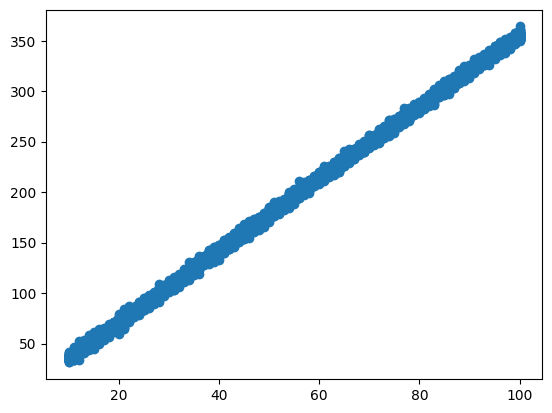

In [167]:
plt.scatter(X['TV'],Y) #Clear Linear Model Regression

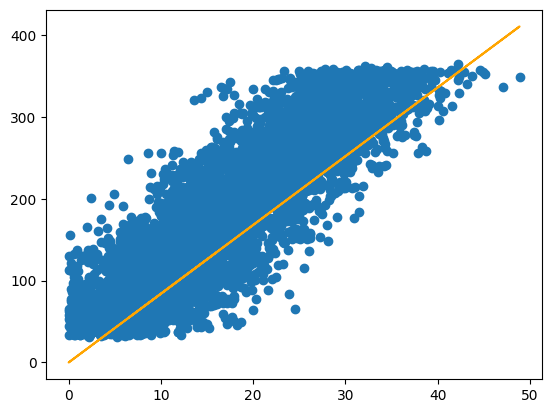

In [168]:
plt.scatter(X['Radio'],Y)
plt.plot(X['Radio'],8.4*X['Radio'],color='orange') # A classification model is pointless (More in ReadME file.)

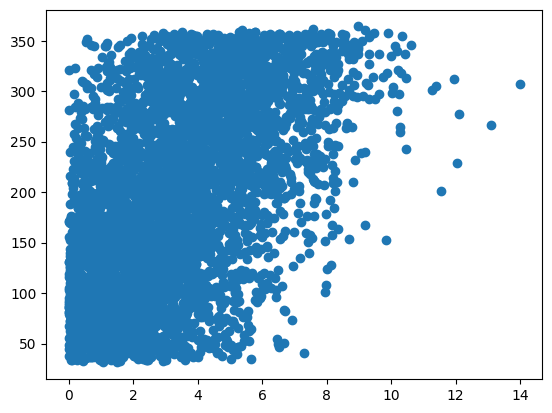

In [169]:
plt.scatter(X['Social Media'],Y)
#A classification model is pointless (More in ReadME file.) -> Most data is centred around a region neglecting a FEW outliers.

In [170]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [171]:
cls = linear_model.LinearRegression()

In [172]:
cls.fit(X_train,Y_train)

LinearRegression()

In [173]:
prediction = cls.predict(X_test)

In [174]:
error1 = mean_squared_error(Y_test, prediction)

In [175]:
print(error1)

8.424499371814118


In [176]:
error2 = r2_score(Y_test,prediction)

In [177]:
print("R² score for the regression model is ",error2)

R² score for the regression model is  0.9990226664969145


In [178]:
check_x = np.isnan(X)
check_x

,TV,Radio,Social Media,Influencer_encoded
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
4567,False,False,False,False
4568,False,False,False,False
4569,False,False,False,False
4570,False,False,False,False


In [179]:
check_y = np.isnan(Y)
check_y

0       False
1       False
2       False
3       False
4       False
        ...  
4567    False
4568    False
4569    False
4570    False
4571    False
Name: Sales, Length: 4546, dtype: bool

In [180]:
X.shape

(4546, 4)

In [181]:
Y.shape

(4546,)

In [183]:
knn5 = KNeighborsClassifier(n_neighbors = 5)
knn1 = KNeighborsClassifier(n_neighbors=1)

In [184]:
knn5.fit(X_train, Y_train)
knn1.fit(X_train, Y_train)

y_pred_5 = knn5.predict(X_test)
y_pred_1 = knn1.predict(X_test)

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [185]:
# Our data here is continous in nature and cannot be modelled into a classification system. Hence, this error. It is better to use the linear regression model in this dataset.